In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Create output directory
output_dir = '../REPORTS/OUTPUT'
os.makedirs(output_dir, exist_ok=True)

print("=== PRAKTIKUM MACHINE LEARNING - PEMINATAN AI INFORMATICS STT-NF ===")
print("=== PREDIKSI CUACA MENGGUNAKAN NAIVE BAYES DAN KNN ===")
print()

# Load weather dataset
print("Loading weather dataset...")
data = pd.read_csv('../DATA/data.csv')

print("Dataset shape:", data.shape)
print()

# Display basic info
print("Dataset info:")
data.info()
print()
print("First 5 rows:")
print(data.head())
print()
print("Weather types:")
print(data['Weather Type'].value_counts())

=== PRAKTIKUM MACHINE LEARNING - PEMINATAN AI INFORMATICS STT-NF ===
=== PREDIKSI CUACA MENGGUNAKAN NAIVE BAYES DAN KNN ===

Loading weather dataset...
Dataset shape: (13200, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), obje

# LATIHAN 1: Klasifikasi Suhu Udara berdasarkan Persepsi (Panas/Dingin)

In [2]:
# Check missing values
print("=== MISSING VALUES CHECK ===")
print("Missing values per column:")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

=== MISSING VALUES CHECK ===
Missing values per column:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Total missing values: 0


In [3]:
# Data preprocessing for Latihan 1: Create binary classification based on temperature
print("=== LATIHAN 1: KLASIFIKASI SUHU UDARA (PERSEPSI MARRY) ===")
print("Membuat klasifikasi berdasarkan temperatur:")
print("- DINGIN: Temperatur <= 15°C")
print("- PANAS: Temperatur > 15°C")
print()

# Create temperature perception based on Marry's criteria
data['Persepsi_Suhu'] = data['Temperature'].apply(lambda x: 'DINGIN' if x <= 15 else 'PANAS')

print("Distribusi Persepsi Suhu:")
print(data['Persepsi_Suhu'].value_counts())
print("\nPersentase:")
print(data['Persepsi_Suhu'].value_counts(normalize=True) * 100)

=== LATIHAN 1: KLASIFIKASI SUHU UDARA (PERSEPSI MARRY) ===
Membuat klasifikasi berdasarkan temperatur:
- DINGIN: Temperatur <= 15°C
- PANAS: Temperatur > 15°C

Distribusi Persepsi Suhu:
Persepsi_Suhu
PANAS     8177
DINGIN    5023
Name: count, dtype: int64

Persentase:
Persepsi_Suhu
PANAS     61.94697
DINGIN    38.05303
Name: proportion, dtype: float64


In [4]:
# Create test case for Marry's perception
print("=== TEST CASE MARRY ===")
print("Temperatur: 16°C, Kecepatan Angin: 3 km/h")
print()

# Select features for Marry's perception model (Temperature and Wind Speed)
marry_features = ['Temperature', 'Wind Speed']
X_marry = data[marry_features]
y_marry = data['Persepsi_Suhu']

# Display sample data for Marry's model
print("Sample data untuk model persepsi Marry:")
sample_data = pd.concat([X_marry, y_marry], axis=1).head(10)
print(sample_data)

=== TEST CASE MARRY ===
Temperatur: 16°C, Kecepatan Angin: 3 km/h

Sample data untuk model persepsi Marry:
   Temperature  Wind Speed Persepsi_Suhu
0         14.0         9.5        DINGIN
1         39.0         8.5         PANAS
2         30.0         7.0         PANAS
3         38.0         1.5         PANAS
4         27.0        17.0         PANAS
5         32.0         3.5         PANAS
6         -2.0         8.0        DINGIN
7          3.0         6.0        DINGIN
8          3.0         6.0        DINGIN
9         28.0         8.5         PANAS


In [5]:
# Encode target for binary classification
le = LabelEncoder()
y_marry_encoded = le.fit_transform(y_marry)
print("Encoding target:")
print("DINGIN =", le.transform(['DINGIN'])[0])
print("PANAS =", le.transform(['PANAS'])[0])
print()

# Split data for Marry's model
X_train_marry, X_test_marry, y_train_marry, y_test_marry = train_test_split(
    X_marry, y_marry_encoded, test_size=0.3, random_state=42, stratify=y_marry_encoded
)

print("Data split untuk model Marry:")
print(f"Training: {X_train_marry.shape[0]} samples")
print(f"Testing: {X_test_marry.shape[0]} samples")

Encoding target:
DINGIN = 0
PANAS = 1

Data split untuk model Marry:
Training: 9240 samples
Testing: 3960 samples


# Data Analysis & Visualization

In [6]:
# Display descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
print(data.describe())

=== DESCRIPTIVE STATISTICS ===
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      

=== WEATHER DATA ANALYSIS ===


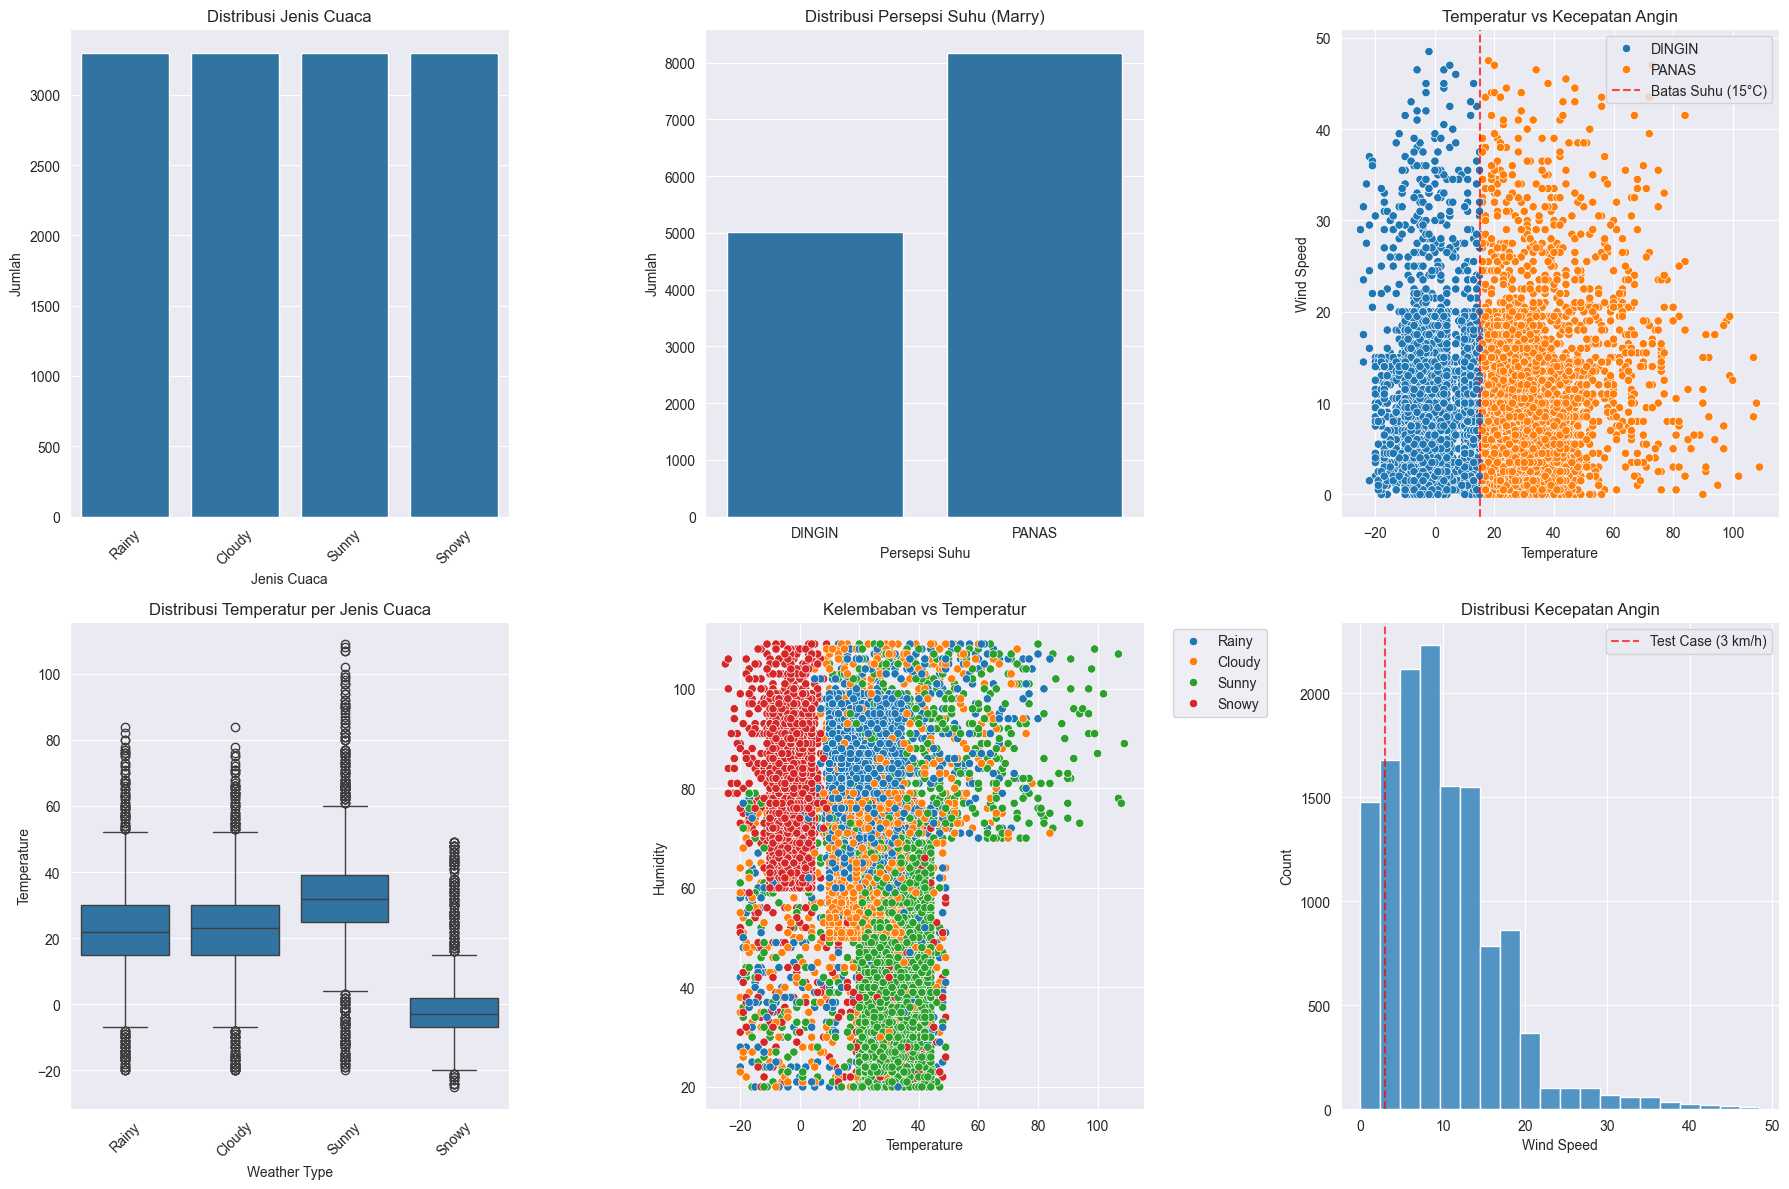

Weather analysis plot saved to ../REPORTS/OUTPUT/latihan1_weather_analysis.png


In [7]:
# Weather analysis and visualization
print("=== WEATHER DATA ANALYSIS ===")

# Create visualizations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot 1: Weather Type distribution
sns.countplot(data=data, x='Weather Type', ax=axes[0])
axes[0].set_title('Distribusi Jenis Cuaca', fontsize=12)
axes[0].set_xlabel('Jenis Cuaca')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Persepsi Suhu distribution
sns.countplot(data=data, x='Persepsi_Suhu', ax=axes[1])
axes[1].set_title('Distribusi Persepsi Suhu (Marry)', fontsize=12)
axes[1].set_xlabel('Persepsi Suhu')
axes[1].set_ylabel('Jumlah')

# Plot 3: Temperature vs Wind Speed (colored by Persepsi Suhu)
sns.scatterplot(data=data, x='Temperature', y='Wind Speed', hue='Persepsi_Suhu', ax=axes[2])
axes[2].set_title('Temperatur vs Kecepatan Angin', fontsize=12)
axes[2].axvline(x=15, color='red', linestyle='--', alpha=0.7, label='Batas Suhu (15°C)')
axes[2].legend()

# Plot 4: Temperature distribution by Weather Type
sns.boxplot(data=data, x='Weather Type', y='Temperature', ax=axes[3])
axes[3].set_title('Distribusi Temperatur per Jenis Cuaca', fontsize=12)
axes[3].tick_params(axis='x', rotation=45)

# Plot 5: Humidity vs Temperature
sns.scatterplot(data=data, x='Temperature', y='Humidity', hue='Weather Type', ax=axes[4])
axes[4].set_title('Kelembaban vs Temperatur', fontsize=12)
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 6: Wind Speed distribution
sns.histplot(data=data, x='Wind Speed', bins=20, ax=axes[5])
axes[5].set_title('Distribusi Kecepatan Angin', fontsize=12)
axes[5].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Test Case (3 km/h)')
axes[5].legend()

plt.tight_layout()
plt.savefig(f'{output_dir}/latihan1_weather_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Weather analysis plot saved to {output_dir}/latihan1_weather_analysis.png")

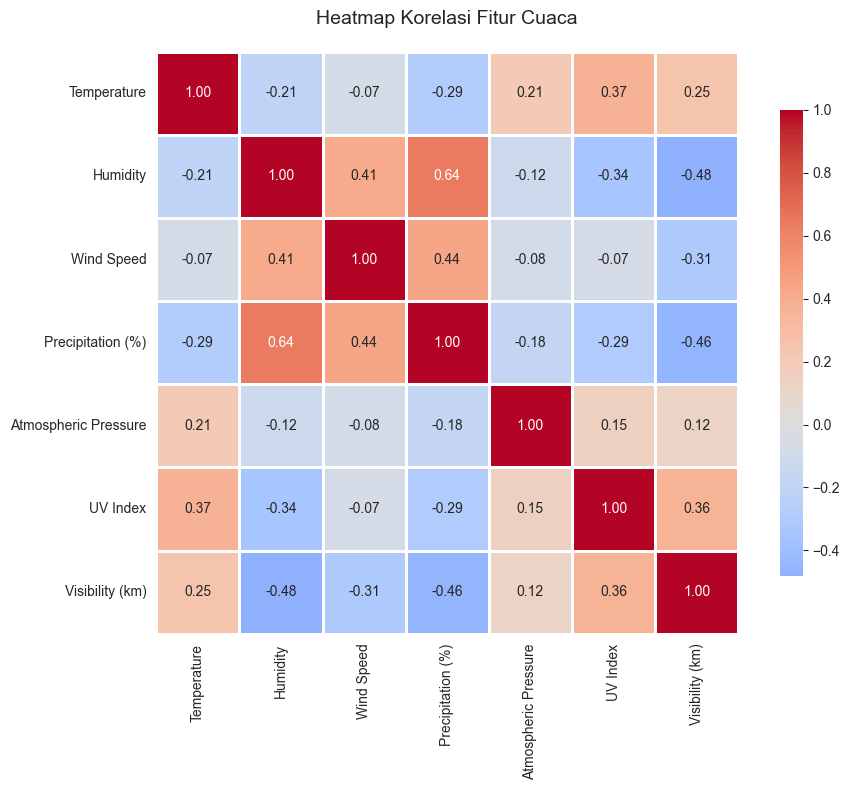

Correlation heatmap saved to ../REPORTS/OUTPUT/latihan1_correlation_heatmap.png


In [8]:
# Correlation heatmap for weather features
numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
correlation_data = data[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Fitur Cuaca', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/latihan1_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Correlation heatmap saved to {output_dir}/latihan1_correlation_heatmap.png")

# LATIHAN 1: KNN untuk Persepsi Suhu Marry (Temperature 16°C, Wind Speed 3 km/h)

In [9]:
# Scale features for Marry's model
scaler_marry = StandardScaler()
X_train_marry_scaled = scaler_marry.fit_transform(X_train_marry)
X_test_marry_scaled = scaler_marry.transform(X_test_marry)

# Test case: Temperature 16°C, Wind Speed 3 km/h
test_case = np.array([[16.0, 3.0]])
test_case_scaled = scaler_marry.transform(test_case)

print("=== LATIHAN 1: OPTIMASI NILAI K UNTUK KNN ===")
print("Mencari nilai k terbaik untuk prediksi persepsi suhu Marry...")

# Test different k values
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_marry_scaled, y_train_marry, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Find best k
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"\nHasil optimasi nilai k:")
print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi terbaik: {best_score:.4f}")

=== LATIHAN 1: OPTIMASI NILAI K UNTUK KNN ===
Mencari nilai k terbaik untuk prediksi persepsi suhu Marry...


C:\Users\Arch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Hasil optimasi nilai k:
Nilai k terbaik: 20
Akurasi terbaik: 0.9986


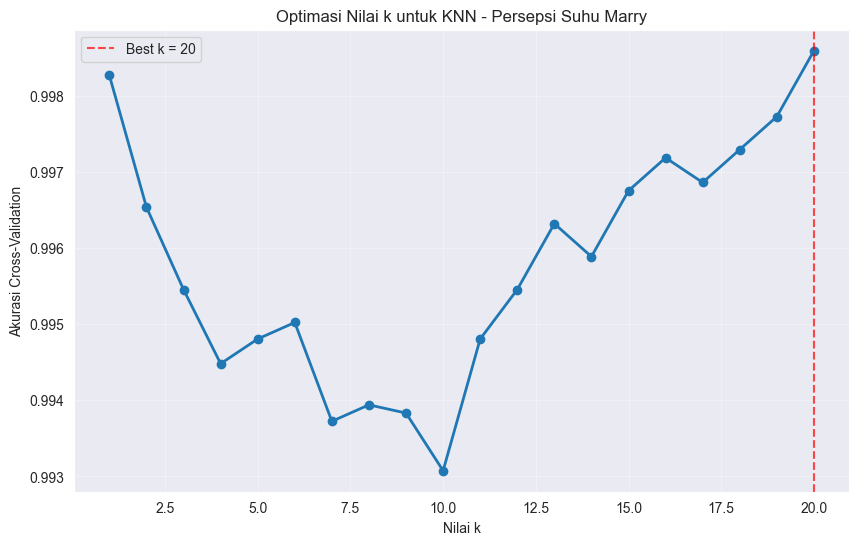

K optimization plot saved to ../REPORTS/OUTPUT/latihan1_k_optimization.png


In [10]:
# Visualize k optimization
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linewidth=2, markersize=6)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best k = {best_k}')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Optimasi Nilai k untuk KNN - Persepsi Suhu Marry')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig(f'{output_dir}/latihan1_k_optimization.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"K optimization plot saved to {output_dir}/latihan1_k_optimization.png")

In [11]:
# Train final model with best k and make prediction
print(f"=== PREDIKSI DENGAN K={best_k} ===")
knn_marry = KNeighborsClassifier(n_neighbors=best_k)
knn_marry.fit(X_train_marry_scaled, y_train_marry)

# Make prediction for test case
test_prediction = knn_marry.predict(test_case_scaled)
test_proba = knn_marry.predict_proba(test_case_scaled)

prediction_label = le.inverse_transform(test_prediction)[0]
print(f"Test Case: Temperatur 16°C, Kecepatan Angin 3 km/h")
print(f"Prediksi Persepsi Marry: {prediction_label}")
print(f"Probabilitas DINGIN: {test_proba[0][0]:.3f}")
print(f"Probabilitas PANAS: {test_proba[0][1]:.3f}")

# Evaluate model on test set
y_pred_marry = knn_marry.predict(X_test_marry_scaled)
accuracy_marry = accuracy_score(y_test_marry, y_pred_marry)
print(f"\nAkurasi model pada test set: {accuracy_marry:.4f}")

=== PREDIKSI DENGAN K=20 ===
Test Case: Temperatur 16°C, Kecepatan Angin 3 km/h
Prediksi Persepsi Marry: PANAS
Probabilitas DINGIN: 0.250
Probabilitas PANAS: 0.750

Akurasi model pada test set: 0.9962


# LATIHAN 2: Prediksi Cuaca menggunakan Machine Learning

In [12]:
# Prepare full weather prediction model
print("=== LATIHAN 2: PREDIKSI JENIS CUACA ===")
print("Menggunakan semua fitur untuk memprediksi jenis cuaca...")

# Check data types first
print("Data types:")
print(data.dtypes)
print("\nUnique values in Cloud Cover:")
print(data['Cloud Cover'].unique())

# Select numeric features for weather prediction
weather_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                   'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Encode ALL categorical features
le_season = LabelEncoder()
le_location = LabelEncoder()
le_cloud_cover = LabelEncoder()

data['Season_encoded'] = le_season.fit_transform(data['Season'])
data['Location_encoded'] = le_location.fit_transform(data['Location'])
data['Cloud_Cover_encoded'] = le_cloud_cover.fit_transform(data['Cloud Cover'])

# Add encoded features
weather_features.extend(['Season_encoded', 'Location_encoded', 'Cloud_Cover_encoded'])

X_weather = data[weather_features]
y_weather = data['Weather Type']

# Encode target
le_weather = LabelEncoder()
y_weather_encoded = le_weather.fit_transform(y_weather)

print("Weather types encoding:")
for i, weather_type in enumerate(le_weather.classes_):
    print(f"{weather_type} = {i}")

# Split data
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(
    X_weather, y_weather_encoded, test_size=0.3, random_state=42, stratify=y_weather_encoded
)

# Scale features
scaler_weather = StandardScaler()
X_train_weather_scaled = scaler_weather.fit_transform(X_train_weather)
X_test_weather_scaled = scaler_weather.transform(X_test_weather)

print(f"Training samples: {X_train_weather.shape[0]}")
print(f"Testing samples: {X_test_weather.shape[0]}")

=== LATIHAN 2: PREDIKSI JENIS CUACA ===
Menggunakan semua fitur untuk memprediksi jenis cuaca...
Data types:
Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
Persepsi_Suhu            object
dtype: object

Unique values in Cloud Cover:
['partly cloudy' 'clear' 'overcast' 'cloudy']
Weather types encoding:
Cloudy = 0
Rainy = 1
Snowy = 2
Sunny = 3
Training samples: 9240
Testing samples: 3960


In [13]:
# Model 1: Naive Bayes untuk Prediksi Cuaca
print("=== MODEL 1: NAIVE BAYES UNTUK PREDIKSI CUACA ===")
nb_weather = GaussianNB()
nb_weather.fit(X_train_weather_scaled, y_train_weather)

nb_train_pred_weather = nb_weather.predict(X_train_weather_scaled)
nb_test_pred_weather = nb_weather.predict(X_test_weather_scaled)

print("Naive Bayes Results:")
print(f"Train Accuracy: {accuracy_score(y_train_weather, nb_train_pred_weather):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_weather, nb_test_pred_weather):.4f}")

=== MODEL 1: NAIVE BAYES UNTUK PREDIKSI CUACA ===
Naive Bayes Results:
Train Accuracy: 0.8616
Test Accuracy: 0.8593


=== LATIHAN 2: TABEL CONFUSION MATRIX ===
Confusion Matrix - Naive Bayes (Weather Prediction):
Tabel Confusion Matrix:
Actual\PredictedCloudy    Rainy     Snowy     Sunny     
Cloudy         799       125       10        56        
Rainy          37        836       61        56        
Snowy          26        7         894       63        
Sunny          70        42        4         874       


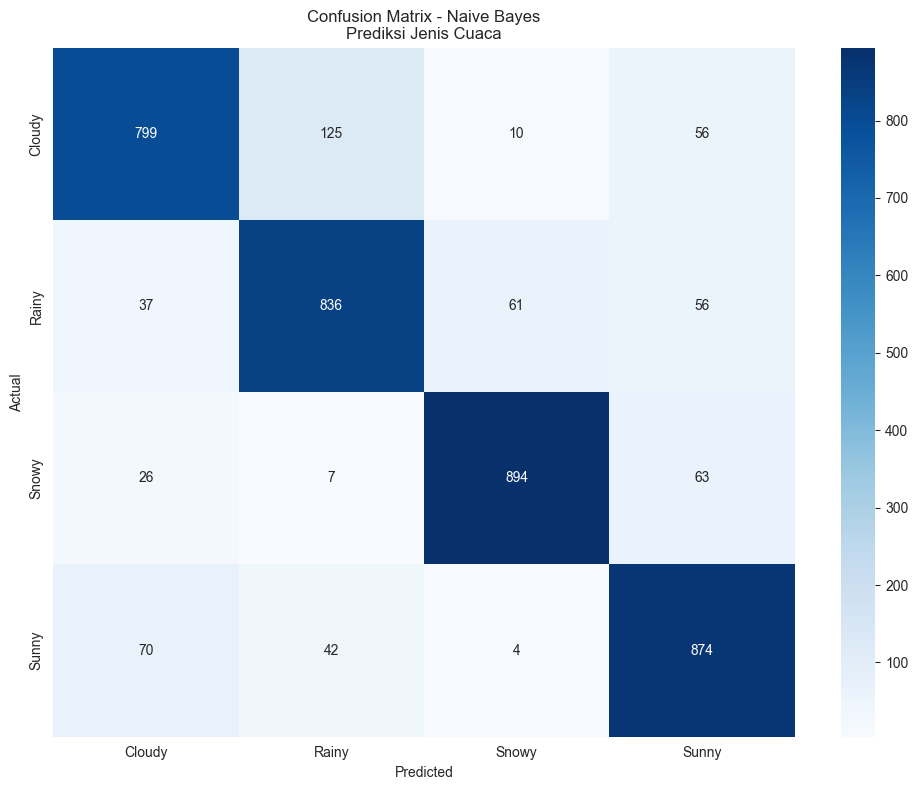

Confusion matrix saved to ../REPORTS/OUTPUT/latihan2_confusion_matrix_weather.png


In [14]:
# LATIHAN 2: Buat tabel confusion matrix berdasarkan hasil prediksi
print("=== LATIHAN 2: TABEL CONFUSION MATRIX ===")
cm_nb_weather = confusion_matrix(y_test_weather, nb_test_pred_weather)
weather_labels = le_weather.classes_

print("Confusion Matrix - Naive Bayes (Weather Prediction):")
print("Tabel Confusion Matrix:")

# Create formatted table
print(f"{'Actual\\Predicted':<15}", end="")
for label in weather_labels:
    print(f"{label:<10}", end="")
print()

for i, actual_label in enumerate(weather_labels):
    print(f"{actual_label:<15}", end="")
    for j in range(len(weather_labels)):
        print(f"{cm_nb_weather[i,j]:<10}", end="")
    print()

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb_weather, annot=True, fmt='d', cmap='Blues',
            xticklabels=weather_labels, yticklabels=weather_labels)
plt.title('Confusion Matrix - Naive Bayes\nPrediksi Jenis Cuaca')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(f'{output_dir}/latihan2_confusion_matrix_weather.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Confusion matrix saved to {output_dir}/latihan2_confusion_matrix_weather.png")

In [15]:
# LATIHAN 2: Hitung nilai persentase accuracy, precision, dan recall
print("=== LATIHAN 2: PERHITUNGAN METRIK EVALUASI (PERSENTASE) ===")

# Calculate metrics in percentage
accuracy_weather = accuracy_score(y_test_weather, nb_test_pred_weather) * 100
precision_weather = precision_score(y_test_weather, nb_test_pred_weather, average='weighted') * 100
recall_weather = recall_score(y_test_weather, nb_test_pred_weather, average='weighted') * 100

print("Hasil Evaluasi Model Naive Bayes (Prediksi Cuaca):")
print(f"Accuracy:  {accuracy_weather:.2f}%")
print(f"Precision: {precision_weather:.2f}%")
print(f"Recall:    {recall_weather:.2f}%")

# Calculate per-class metrics
precision_per_class = precision_score(y_test_weather, nb_test_pred_weather, average=None) * 100
recall_per_class = recall_score(y_test_weather, nb_test_pred_weather, average=None) * 100

print("\nMetrik per jenis cuaca:")
for i, weather_type in enumerate(weather_labels):
    print(f"{weather_type}:")
    print(f"  Precision: {precision_per_class[i]:.2f}%")
    print(f"  Recall:    {recall_per_class[i]:.2f}%")

# Detailed classification report
print("\nClassification Report Detail:")
print(classification_report(y_test_weather, nb_test_pred_weather,
                          target_names=weather_labels, digits=4))

=== LATIHAN 2: PERHITUNGAN METRIK EVALUASI (PERSENTASE) ===
Hasil Evaluasi Model Naive Bayes (Prediksi Cuaca):
Accuracy:  85.93%
Precision: 86.02%
Recall:    85.93%

Metrik per jenis cuaca:
Cloudy:
  Precision: 85.73%
  Recall:    80.71%
Rainy:
  Precision: 82.77%
  Recall:    84.44%
Snowy:
  Precision: 92.26%
  Recall:    90.30%
Sunny:
  Precision: 83.32%
  Recall:    88.28%

Classification Report Detail:
              precision    recall  f1-score   support

      Cloudy     0.8573    0.8071    0.8314       990
       Rainy     0.8277    0.8444    0.8360       990
       Snowy     0.9226    0.9030    0.9127       990
       Sunny     0.8332    0.8828    0.8573       990

    accuracy                         0.8593      3960
   macro avg     0.8602    0.8593    0.8594      3960
weighted avg     0.8602    0.8593    0.8594      3960



# LATIHAN 3: Studi Kasus - Gunakan KNN untuk Prediksi Cuaca

In [16]:
print("=== LATIHAN 3: KNN UNTUK PREDIKSI CUACA ===")
print("Implementasi K-Nearest Neighbors untuk prediksi jenis cuaca")

# Find optimal k for weather prediction
print("Mencari nilai k optimal untuk prediksi cuaca...")
k_range_weather = range(1, 21)
k_scores_weather = []

for k in k_range_weather:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_weather_scaled, y_train_weather, cv=5, scoring='accuracy')
    k_scores_weather.append(scores.mean())

best_k_weather = k_range_weather[np.argmax(k_scores_weather)]
best_score_weather = max(k_scores_weather)

print(f"Nilai k terbaik untuk prediksi cuaca: {best_k_weather}")
print(f"Akurasi cross-validation terbaik: {best_score_weather:.4f}")

=== LATIHAN 3: KNN UNTUK PREDIKSI CUACA ===
Implementasi K-Nearest Neighbors untuk prediksi jenis cuaca
Mencari nilai k optimal untuk prediksi cuaca...
Nilai k terbaik untuk prediksi cuaca: 6
Akurasi cross-validation terbaik: 0.8984


In [17]:
# Train KNN model with optimal k
knn_weather = KNeighborsClassifier(n_neighbors=best_k_weather)
knn_weather.fit(X_train_weather_scaled, y_train_weather)

knn_train_pred_weather = knn_weather.predict(X_train_weather_scaled)
knn_test_pred_weather = knn_weather.predict(X_test_weather_scaled)

print(f"KNN Results (k={best_k_weather}):")
print(f"Train Accuracy: {accuracy_score(y_train_weather, knn_train_pred_weather):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_weather, knn_test_pred_weather):.4f}")

KNN Results (k=6):
Train Accuracy: 0.9224
Test Accuracy: 0.8967


=== CONFUSION MATRIX KNN - PREDIKSI CUACA ===
Confusion Matrix - KNN (Weather Prediction):
Actual\PredictedCloudy    Rainy     Snowy     Sunny     
Cloudy         880       75        16        19        
Rainy          52        896       30        12        
Snowy          49        24        901       16        
Sunny          81        26        9         874       


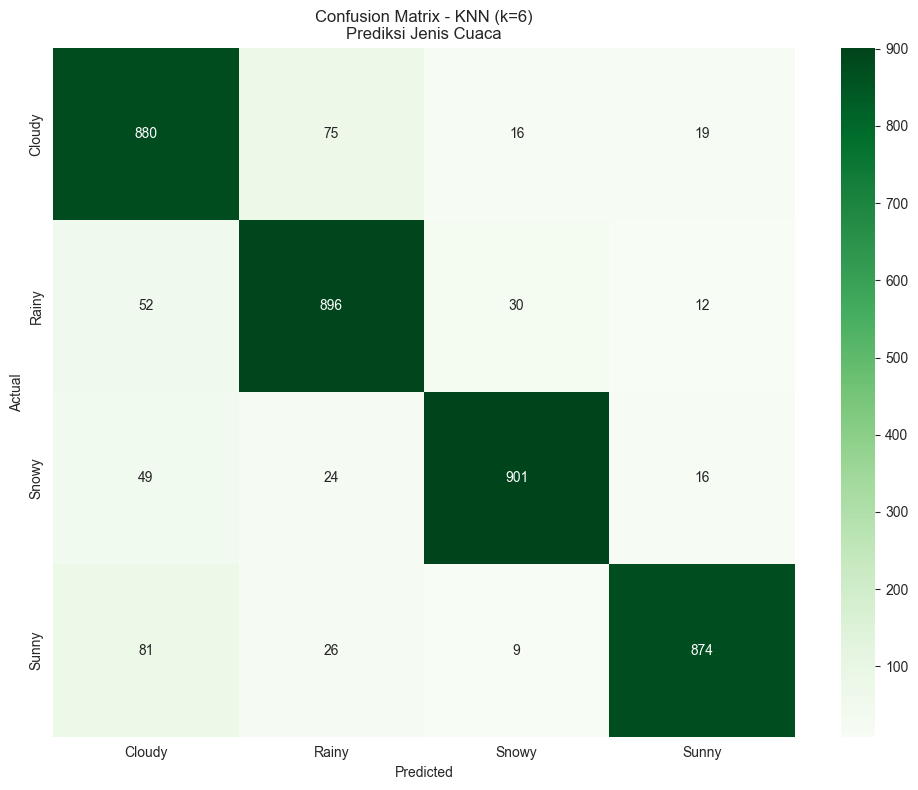

KNN confusion matrix saved to ../REPORTS/OUTPUT/latihan3_confusion_matrix_knn_weather.png


In [18]:
# KNN Confusion Matrix untuk prediksi cuaca
print("=== CONFUSION MATRIX KNN - PREDIKSI CUACA ===")
cm_knn_weather = confusion_matrix(y_test_weather, knn_test_pred_weather)

print("Confusion Matrix - KNN (Weather Prediction):")
print(f"{'Actual\\Predicted':<15}", end="")
for label in weather_labels:
    print(f"{label:<10}", end="")
print()

for i, actual_label in enumerate(weather_labels):
    print(f"{actual_label:<15}", end="")
    for j in range(len(weather_labels)):
        print(f"{cm_knn_weather[i,j]:<10}", end="")
    print()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn_weather, annot=True, fmt='d', cmap='Greens',
            xticklabels=weather_labels, yticklabels=weather_labels)
plt.title(f'Confusion Matrix - KNN (k={best_k_weather})\nPrediksi Jenis Cuaca')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(f'{output_dir}/latihan3_confusion_matrix_knn_weather.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"KNN confusion matrix saved to {output_dir}/latihan3_confusion_matrix_knn_weather.png")

In [19]:
# KNN Performance Metrics untuk prediksi cuaca
accuracy_knn_weather = accuracy_score(y_test_weather, knn_test_pred_weather) * 100
precision_knn_weather = precision_score(y_test_weather, knn_test_pred_weather, average='weighted') * 100
recall_knn_weather = recall_score(y_test_weather, knn_test_pred_weather, average='weighted') * 100

print("Hasil Evaluasi Model KNN (Prediksi Cuaca):")
print(f"Accuracy:  {accuracy_knn_weather:.2f}%")
print(f"Precision: {precision_knn_weather:.2f}%")
print(f"Recall:    {recall_knn_weather:.2f}%")

# Per-class metrics for KNN
precision_knn_per_class = precision_score(y_test_weather, knn_test_pred_weather, average=None) * 100
recall_knn_per_class = recall_score(y_test_weather, knn_test_pred_weather, average=None) * 100

print("\nMetrik KNN per jenis cuaca:")
for i, weather_type in enumerate(weather_labels):
    print(f"{weather_type}:")
    print(f"  Precision: {precision_knn_per_class[i]:.2f}%")
    print(f"  Recall:    {recall_knn_per_class[i]:.2f}%")

Hasil Evaluasi Model KNN (Prediksi Cuaca):
Accuracy:  89.67%
Precision: 89.94%
Recall:    89.67%

Metrik KNN per jenis cuaca:
Cloudy:
  Precision: 82.86%
  Recall:    88.89%
Rainy:
  Precision: 87.76%
  Recall:    90.51%
Snowy:
  Precision: 94.25%
  Recall:    91.01%
Sunny:
  Precision: 94.90%
  Recall:    88.28%


# Perbandingan Model dan Ringkasan Hasil

In [20]:
print("=== PERBANDINGAN MODEL UNTUK PREDIKSI CUACA ===")
print("Hasil perbandingan Naive Bayes vs KNN:")
print(f"{'Model':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 56)
print(f"{'Naive Bayes':<20} {accuracy_weather:<12.2f} {precision_weather:<12.2f} {recall_weather:<12.2f}")
print(f"{'KNN (k=' + str(best_k_weather) + ')':<20} {accuracy_knn_weather:<12.2f} {precision_knn_weather:<12.2f} {recall_knn_weather:<12.2f}")

# Cross validation comparison
print("\n=== CROSS VALIDATION COMPARISON ===")
cv_nb_weather = cross_val_score(nb_weather, X_train_weather_scaled, y_train_weather, cv=5, scoring='accuracy')
cv_knn_weather_final = cross_val_score(knn_weather, X_train_weather_scaled, y_train_weather, cv=5, scoring='accuracy')

print("Naive Bayes Cross Validation (Weather):")
print(f"Mean Accuracy: {cv_nb_weather.mean():.4f} (+/- {cv_nb_weather.std() * 2:.4f})")

print(f"\nKNN (k={best_k_weather}) Cross Validation (Weather):")
print(f"Mean Accuracy: {cv_knn_weather_final.mean():.4f} (+/- {cv_knn_weather_final.std() * 2:.4f})")

=== PERBANDINGAN MODEL UNTUK PREDIKSI CUACA ===
Hasil perbandingan Naive Bayes vs KNN:
Model                Accuracy     Precision    Recall      
--------------------------------------------------------
Naive Bayes          85.93        86.02        85.93       
KNN (k=6)            89.67        89.94        89.67       

=== CROSS VALIDATION COMPARISON ===
Naive Bayes Cross Validation (Weather):
Mean Accuracy: 0.8615 (+/- 0.0129)

KNN (k=6) Cross Validation (Weather):
Mean Accuracy: 0.8984 (+/- 0.0128)


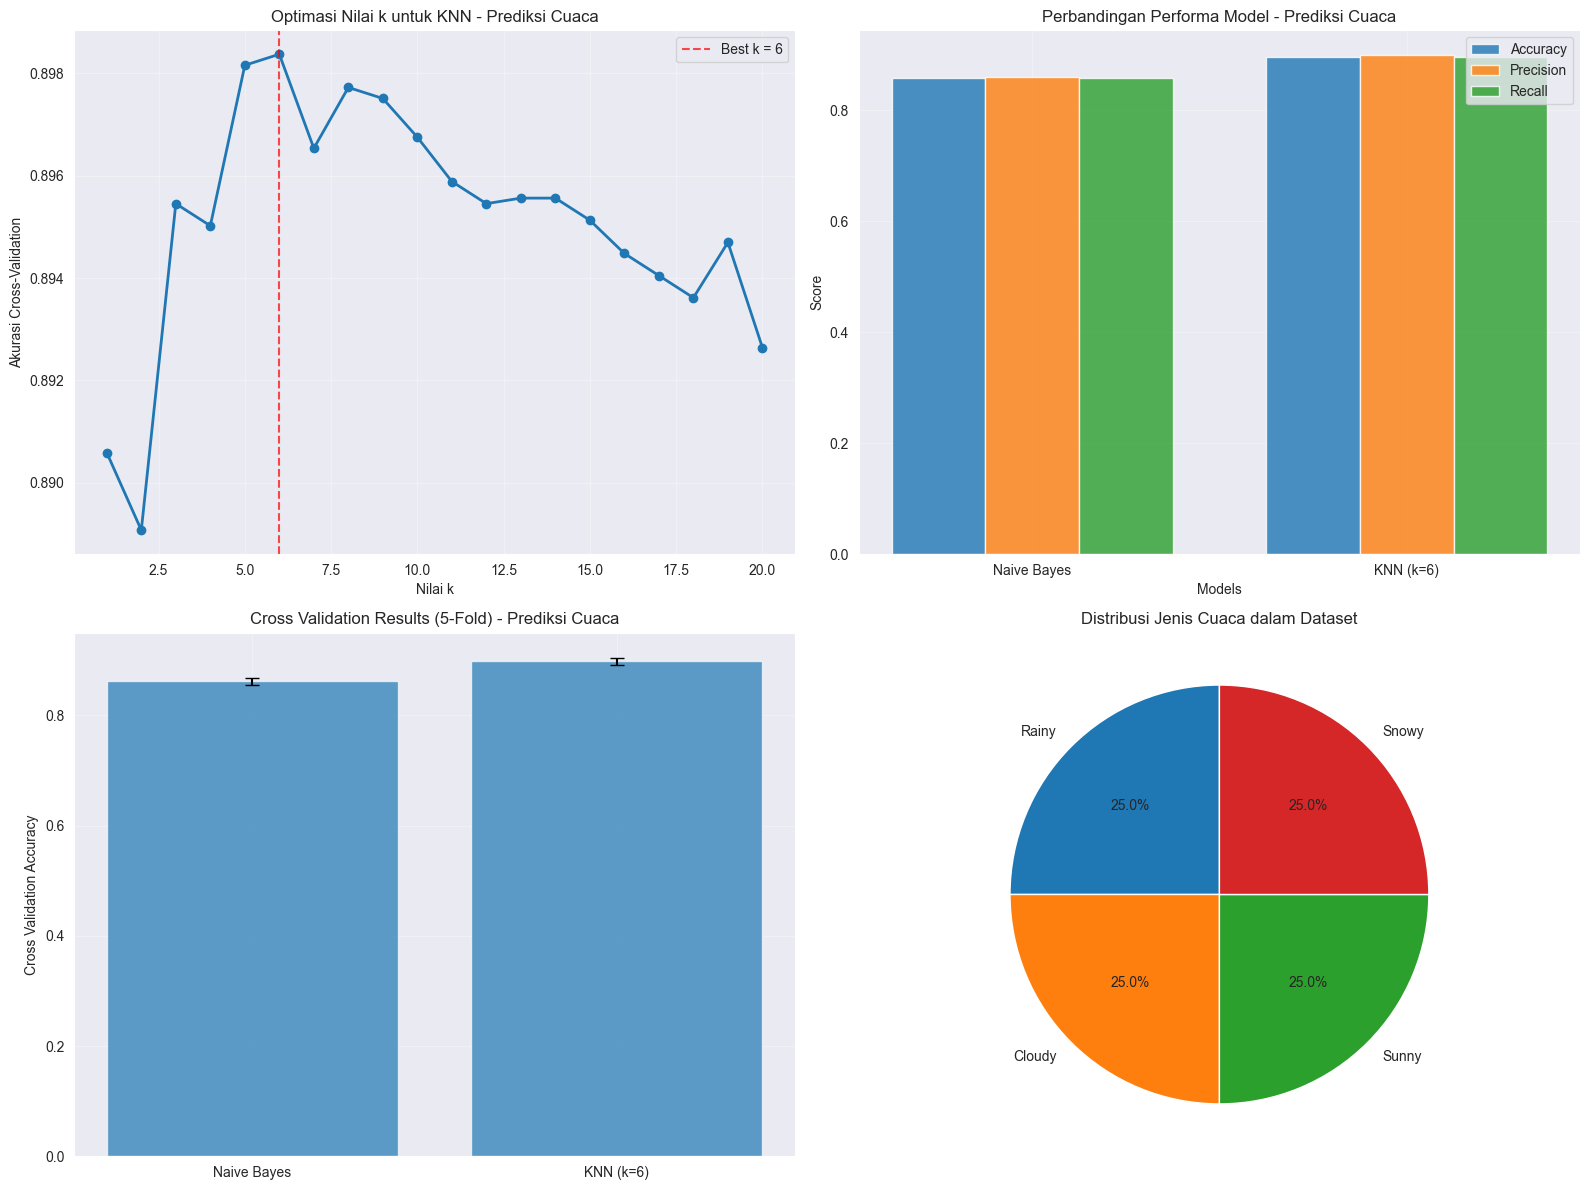

Complete summary saved to ../REPORTS/OUTPUT/latihan_complete_summary.png

RINGKASAN HASIL PRAKTIKUM
LATIHAN 1: Klasifikasi Persepsi Suhu (Marry)
- Test case (16°C, 3km/h): Prediksi = PANAS
- Nilai k optimal: 20
- Akurasi: 0.9962

LATIHAN 2: Prediksi Cuaca - Confusion Matrix & Metrics
- Model: Naive Bayes
- Accuracy: 85.93%
- Precision: 86.02%
- Recall: 85.93%

LATIHAN 3: KNN untuk Prediksi Cuaca
- Nilai k optimal: 6
- Accuracy: 89.67%
- Precision: 89.94%
- Recall: 89.67%


In [21]:
# Final summary visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. K optimization plot
axes[0,0].plot(k_range_weather, k_scores_weather, marker='o', linewidth=2, markersize=6)
axes[0,0].axvline(x=best_k_weather, color='red', linestyle='--', alpha=0.7, label=f'Best k = {best_k_weather}')
axes[0,0].set_xlabel('Nilai k')
axes[0,0].set_ylabel('Akurasi Cross-Validation')
axes[0,0].set_title('Optimasi Nilai k untuk KNN - Prediksi Cuaca')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. Model comparison
models = ['Naive Bayes', f'KNN (k={best_k_weather})']
accuracies_weather = [accuracy_weather/100, accuracy_knn_weather/100]
precisions_weather = [precision_weather/100, precision_knn_weather/100]
recalls_weather = [recall_weather/100, recall_knn_weather/100]

x = np.arange(len(models))
width = 0.25

axes[0,1].bar(x - width, accuracies_weather, width, label='Accuracy', alpha=0.8)
axes[0,1].bar(x, precisions_weather, width, label='Precision', alpha=0.8)
axes[0,1].bar(x + width, recalls_weather, width, label='Recall', alpha=0.8)
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('Score')
axes[0,1].set_title('Perbandingan Performa Model - Prediksi Cuaca')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(models)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Cross validation comparison
cv_means_weather = [cv_nb_weather.mean(), cv_knn_weather_final.mean()]
cv_stds_weather = [cv_nb_weather.std(), cv_knn_weather_final.std()]

axes[1,0].bar(models, cv_means_weather, yerr=cv_stds_weather, alpha=0.7, capsize=5)
axes[1,0].set_ylabel('Cross Validation Accuracy')
axes[1,0].set_title('Cross Validation Results (5-Fold) - Prediksi Cuaca')
axes[1,0].grid(True, alpha=0.3)

# 4. Weather type distribution
weather_counts = data['Weather Type'].value_counts()
axes[1,1].pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Distribusi Jenis Cuaca dalam Dataset')

plt.tight_layout()
plt.savefig(f'{output_dir}/latihan_complete_summary.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Complete summary saved to {output_dir}/latihan_complete_summary.png")

print("\n" + "="*60)
print("RINGKASAN HASIL PRAKTIKUM")
print("="*60)
print("LATIHAN 1: Klasifikasi Persepsi Suhu (Marry)")
print(f"- Test case (16°C, 3km/h): Prediksi = {prediction_label}")
print(f"- Nilai k optimal: {best_k}")
print(f"- Akurasi: {accuracy_marry:.4f}")
print()
print("LATIHAN 2: Prediksi Cuaca - Confusion Matrix & Metrics")
print(f"- Model: Naive Bayes")
print(f"- Accuracy: {accuracy_weather:.2f}%")
print(f"- Precision: {precision_weather:.2f}%")
print(f"- Recall: {recall_weather:.2f}%")
print()
print("LATIHAN 3: KNN untuk Prediksi Cuaca")
print(f"- Nilai k optimal: {best_k_weather}")
print(f"- Accuracy: {accuracy_knn_weather:.2f}%")
print(f"- Precision: {precision_knn_weather:.2f}%")
print(f"- Recall: {recall_knn_weather:.2f}%")
print("="*60)
